# Import?

In [1]:
# # !pip install googletrans==4.0.0-rc1             # package version update
# import googletrans
# from googletrans import Translator
# import pandas as pd
# import numpy as np

# import re
# import string
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
# from nltk.tokenize import sent_tokenize, word_tokenize
# # nltk.download('wordnet')
# # nltk.download('omw-1.4')


# from PIL import Image
# import matplotlib.pyplot as plt
# from wordcloud import STOPWORDS, WordCloud
# import seaborn as sns


# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import make_pipeline
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# Basic Cleaning !

In [1]:
#data                               
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#nlp
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.stem import PorterStemmer
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')
# nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# wordcloud
from PIL import Image
from wordcloud import STOPWORDS, WordCloud

## translation
# import googletrans
# from googletrans import Translator

In [2]:
def preprocessing(sentence):
    sentence = str(sentence)
    sentence = sentence.strip()
    sentence = sentence.lower()
    sentence = ''.join(char for char in sentence if not char.isdigit())
    sentence = sentence.replace('\r\n', ' ')
    
    manual_sw = ['amp']

    manual_sw = ['내', '나를', '나의', '너의', '난', '날', '내가', '너','나', '그', '니', '걸', '거야', '수', '다', '더', "n't",  'l', 'u', '-',
                'na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', '’', 
                 '널', '네', '니가', '네가', '널', '너를', '넌', '내게', '이','-','na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', '’', 
                '“', 'wan', '한', '해', '건', '한', '게', '좀', '두', '안']
    
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, ' ') 

    tokenized_sentence = word_tokenize(sentence) ## tokenize 
    stop_words = list(set(stopwords.words('english'))) ## define stopwords
    stop_words.extend(manual_sw)
    
    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in stop_words
    ]
    
    return ' '.join(tokenized_sentence_cleaned)


In [3]:
girls_df = pd.read_csv('../data/major_girlgroups_final.csv')

In [4]:
girls_df['song_lyrics'] = girls_df['song_lyrics'].apply(preprocessing)

In [5]:
girls_df.head(15)

artist_id               artist_name  album_id  \
0    80026432  소녀시대 (GIRLS' GENERATION)  20528353   
1    80026432  소녀시대 (GIRLS' GENERATION)  20528353   
2    80026432  소녀시대 (GIRLS' GENERATION)  20528353   
3    80026432  소녀시대 (GIRLS' GENERATION)  20528353   
4    80026432  소녀시대 (GIRLS' GENERATION)  20528353   
5    80026432  소녀시대 (GIRLS' GENERATION)  20528353   
6    80026432  소녀시대 (GIRLS' GENERATION)  20484595   
7    80026432  소녀시대 (GIRLS' GENERATION)  20484595   
8    80026432  소녀시대 (GIRLS' GENERATION)  20484595   
9    80026432  소녀시대 (GIRLS' GENERATION)  20484595   
10   80026432  소녀시대 (GIRLS' GENERATION)  20484595   
11   80026432  소녀시대 (GIRLS' GENERATION)  20484595   
12   80026432  소녀시대 (GIRLS' GENERATION)  20484595   
13   80026432  소녀시대 (GIRLS' GENERATION)  20484595   
14   80026432  소녀시대 (GIRLS' GENERATION)  20484595   

                           album_title   song_id  \
0   iScreaM Vol.19 : FOREVER 1 Remixes  32704240   
1   iScreaM Vol.19 : FOREVER 1 Remixes  32704241   
2   iScreaM Vol.19 : FOREVER 1 Remixes  32704242   
3   iScreaM Vol.19 : FOREVER 1 Remixes  32704243   
4   iScreaM Vol.19 : FOREVER 1 Remixes  32704244   
5   iScreaM Vol.19 : FOREVER 1 Remixes  32704245   
6            FOREVER 1 - The 7th Album  32612433   
7            FOREVER 1 - The 7th Album  32612434   
8            FOREVER 1 - The 7th Album  32612435   
9            FOREVER 1 - The 7th Album  32612436   
10           FOREVER 1 - The 7th Album  32612437   
11           FOREVER 1 - The 7th Album  32612438   
12           FOREVER 1 - The 7th Album  32612439   
13           FOREVER 1 - The 7th Album  32612440   
14           FOREVER 1 - The 7th Album  32612441   

                                           song_title release_date  \
0                   FOREVER 1 (Matisse & Sadko Remix)   2022-11-17   
1                           FOREVER 1 (Aiobahn Remix)   2022-11-17   
2                         FOREVER 1 (Mar Vista Remix)   2022-11-17   
3   FOREVER 1 (Matisse & Sadko Remix) (Extended Ver.)   2022-11-17   
4           FOREVER 1 (Aiobahn Remix) (Extended Ver.)   2022-11-17   
5         FOREVER 1 (Mar Vista Remix) (Extended Ver.)   2022-11-17   
6                                           FOREVER 1   2022-08-05   
7                                     Lucky Like That   2022-08-05   
8                                           Seventeen   2022-08-05   
9                                             Villain   2022-08-05   
10                                     You Better Run   2022-08-05   
11                                             Closer   2022-08-05   
12                                          Mood Lamp   2022-08-05   
13                              완벽한 장면 (Summer Night)   2022-08-05   
14                                            Freedom   2022-08-05   

                 song_artist  \
0   소녀시대 (GIRLS' GENERATION)   
1   소녀시대 (GIRLS' GENERATION)   
2   소녀시대 (GIRLS' GENERATION)   
3   소녀시대 (GIRLS' GENERATION)   
4   소녀시대 (GIRLS' GENERATION)   
5   소녀시대 (GIRLS' GENERATION)   
6   소녀시대 (GIRLS' GENERATION)   
7   소녀시대 (GIRLS' GENERATION)   
8   소녀시대 (GIRLS' GENERATION)   
9   소녀시대 (GIRLS' GENERATION)   
10  소녀시대 (GIRLS' GENERATION)   
11  소녀시대 (GIRLS' GENERATION)   
12  소녀시대 (GIRLS' GENERATION)   
13  소녀시대 (GIRLS' GENERATION)   
14  소녀시대 (GIRLS' GENERATION)   

                                          song_lyrics  year  
0   forever love love stopping 머문 세상이 아름다운 겁 없이 외치...  2022  
1   forever love love stopping 머문 세상이 아름다운 겁 없이 외치...  2022  
2   forever love love stopping 머문 세상이 아름다운 겁 없이 외치...  2022  
3   forever love love stopping 머문 세상이 아름다운 겁 없이 외치...  2022  
4   forever love love stopping 머문 세상이 아름다운 겁 없이 외치...  2022  
5   forever love love stopping 머문 세상이 아름다운 겁 없이 외치...  2022  
6   forever love love stopping 머문 세상이 아름다운 겁 없이 외치...  2022  
7   기다려온 소원들이 오늘로 이뤄졌듯이 알잖아 우린 lucky like lucky li...  2022  
8   맞아 느낌 마치 홀린 듯이 너에게 이끌려 깨어나 seventeen 뜨겁던 summe...  2022  
9   모두가 숨죽인 도시 밤은 소리 없는 패닉 지켜줄 hero 대신 열어둘게 여기 bac...  2022  
10  분명

In [6]:
# without filtering
total_lyrics = ' '.join(girls_df['song_lyrics'])
len(total_lyrics)

3358353

In [7]:
df = girls_df.copy()
df['album_title'] = df['album_title'].str.lower()
df['song_title'] = df['song_title'].str.lower()
df['song_lyrics'] = df['song_lyrics'].apply(preprocessing)

In [8]:
# # Feature selection - which columns?
# df.columns

In [9]:
df = df.sort_values('release_date')
df = df[df['artist_name'] != 'Various Artists']
df = df[df['song_lyrics'] != '']
df = df[df['song_lyrics'] != 'nan']
df = df.drop_duplicates(['artist_id','song_title'])
df = df.drop_duplicates(['song_lyrics'], keep='first')

df = df[~df['album_title'].str.contains('remix')]
df = df[~df['album_title'].str.contains('japan')]
df = df[~df['album_title'].str.contains('일본')]
df = df[~df['album_title'].str.contains('live')]
df = df[~df['album_title'].str.contains(' ost ')]
df = df[~df['album_title'].str.contains('inst')]
df = df[~df['album_title'].str.contains('repackage')]
df = df[~df['album_title'].str.contains('chinese')]
df = df[~df['album_title'].str.contains(' ver.')]

df = df[~df['song_title'].str.contains('권리없는')]
df = df[~df['song_title'].str.contains('remix')]
df = df[~df['song_title'].str.contains('japan')]
df = df[~df['song_title'].str.contains('chinese')]
df = df[~df['song_title'].str.contains(' inst ')]
df = df[~df['album_title'].str.contains(' ver.')]
# df.reset_index(inplace=True)
df.shape

(2341, 10)

In [11]:
print('number of rows - original: ', len(girls_df))
print('number of rows - after filtering: ', len(df))

number of rows - original:  6034
number of rows - after filtering:  2341


In [12]:
print('number of rows - original: ', len(' '.join(girls_df['song_lyrics'])))
print('number of rows - after filtering: ', len(' '.join(df['song_lyrics'])))

number of rows - original:  3358353
number of rows - after filtering:  1708339


In [14]:
# artist_df = pd.read_csv('../data/girlgroup_list.csv')

# artist_df = artist_df.dropna()
# artist_df['Artist ID'] = artist_df['Artist ID'].astype(int)
# artist_df.reset_index(inplace=True, drop=True)

# group_lst = artist_df[artist_df['Category']=='Idol']['Artist ID'].tolist()
# solo_lst = artist_df[artist_df['Category']=='Solo']['Artist ID'].tolist()

# By Groups - Keywords

In [13]:
artist_df = pd.read_csv('../data/girlgroup_list.csv')

artist_df = artist_df.dropna()
artist_df['Artist ID'] = artist_df['Artist ID'].astype(int)
artist_df.reset_index(inplace=True, drop=True)

In [14]:
df_artist_year = df.groupby(['artist_id', 'year']).sum()['song_lyrics'].reset_index()
df_artist_year = df_artist_year.merge(artist_df, how='left', left_on = 'artist_id', right_on='Artist ID')[['artist_id', 'year', 'English Name', 'song_lyrics']]
df_artist_year = df_artist_year.rename(columns={'English Name': 'artist_name'})

In [22]:
df_artist_year.to_csv('../data/artist_by_year.csv', index=0)

In [44]:
df_artist_album[df_artist_album['album_id']==20062529]

artist_id  year  album_id            album_title artist_name  \
527   80249916  2016  20062529  twicecoaster : lane 1       TWICE   

                                           song_lyrics  
527  got know one million 짜증이 계속되는 날이면 찾아와봐요 행복으로 가...

In [38]:
def album_img_insert(row):
    row['album_image'] = dict_temp.get(row['album_id'])
    return row
df_temp.apply(album_img_insert, axis = 1)

In [47]:
value='BOA'

In [54]:
dict(zip(df['year'], df['song_lyrics']))

{2000: 'come come come come come come come come 괜히 가슴이 두근거려 너와 함께 있을 때면 괜히 얼굴이 붉어져 목소리 들을 때면 이젠 마음을 열어줘 하늘을 있게 유리병 속에 요정처럼 바라만 보는 싫어 come baby hold 사랑을 느끼고 싶어 이제 내게로 다가와 맘을 전할 있게 이제 손을 잡아줘 편안하게 쉴 있게 이제 미소를 보여줘 너와 꿈꿀 있도록 come love 아무 말이라도 괜찮아 거짓말도 괜찮아 나와 함께하고 싶다는 한마디면 괜찮아 그저 곁에서 맴도는 꼭 안아준다면 위해 몰래 감춰둔 사랑을 보여줄게 come baby hold 사랑을 느끼고 싶어 이제 내게로 다가와 맘을 전할 있게 이제 손을 잡아줘 편안하게 쉴 있게 이제 미소를 보여줘 너와 꿈꿀 있도록 come love baby recognize love bust curve 진심으로 원해 하지만 멀어져 가고만 있는 better let go 결코 그래 사랑은 모든 원하고 있니 느끼니 느끼고 싶니 baby come get get get get 이제 가졌어 내게도 조금도 조금도 baby feel feel feel feel 사랑을 이제 느껴 봐 너만을 원하고 있는 care cause love come baby baby hold 사랑을 느끼고 싶어 이제 내게로 다가와 맘을 전할 있게 이제 손을 잡아줘 편안하게 쉴 있게 이제 미소를 보여줘 너와 꿈꿀 있도록 come love come come come come come baby baby heart come come come come come come come come 이제 미소를 보여줘 come come come come babybaby come baby come 어떤 말로 시작을 할까 상상이나 했었을까 어울리는 풍경일거야 예정됐던 사랑처럼 사랑한다 말하는 이유를 묻지는 말아줘 하늘의 별을 좋아하듯 그냥 이유 없이 좋은걸 baby baby lady tonight 혹시 알고 있었는지 want love heart 행복한 순간을

In [58]:
df_album = pd.read_csv('../data/album_with_images.csv', index_col=0)

In [60]:
df_album.head(2)

artist_id  year  album_id                             album_title  \
0       1168  2000       457                             id; peace b   
1       1168  2001      1967  don't start now-jumping into the world   

  artist_name                                        song_lyrics  \
0         BOA  come come come come come come come come 괜히 가슴이...   
1         BOA  누구였을까 내서랍 속에 아주 조심스레 편지가 놓여 있네 이름도 없는 편지속엔 그저 ...   

                                         album_image  
0  https://image.bugsm.co.kr/album/images/200/4/4...  
1  https://image.bugsm.co.kr/album/images/200/19/...

In [61]:
df = df_album[df_album['artist_name'] == value].dropna(subset=['song_lyrics'])
df

artist_id  year  album_id                                 album_title  \
0        1168  2000       457                                 id; peace b   
1        1168  2001      1967      don't start now-jumping into the world   
2        1168  2002     16305                                        no.1   
3        1168  2002     16713                                     miracle   
4        1168  2003     31529                           atlantis princess   
5        1168  2003     32946           double [the 1st boa single album]   
6        1168  2003     33297                                shine we are   
7        1168  2004     34891                                     my name   
8        1168  2008    166141                         eat you up (미국발매싱글)   
9        1168  2009    180241                                boa (미국발매앨범)   
10       1168  2010    231769                             hurricane venus   
11       1168  2010    238889     'copy & paste' boa the 6th repack album   
12       1168  2012    324278            one dream - kpop star theme song   
13       1168  2012    335937                boa the 7th album 'only one'   
14       1168  2012    344641                      younique album lookin'   
15       1168  2013    356144                                        그런 너   
16       1168  2013    381139                 2013 광주디자인비엔날레 로고송 'action'   
17       1168  2015    501271                kiss my lips - the 8th album   
18       1168  2003   8000015                               rock with you   
19       1168  2000   8000384               winter vacation in smtown.com   
20       1168  2001   8000388  winter vacation in smtown.com - angel eyes   
21       1168  2004   8003378                                  merry-chri   
22       1168  2005   8009228                                girls on top   
23       1168  2005   8014099                    merry christmas from boa   
24       1168  2006   8015334                                 everlasting   
25       1168  2006   8022012               key of heart (limited single)   
26       1168  2006   8023422             2006 winter smtown - snow dream   
27       1168  2007   8032198                07 winter smtown - only love   
28       1168  2015  20013415                                    lookbook   
29       1168  2015  20014177          christmas paradise - winter garden   
30       1168  2016  20020750                            make me complete   
31       1168  2016  20041014                 no matter what - sm station   
32       1168  2017  20095436               봄비 (spring rain) - sm station   
33       1168  2017  20104910                                        camo   
34       1168  2017  20119108                right here, right everywhere   
35       1168  2018  20145201                           내가 돌아 (nega dola)   
36       1168  2018  20148749     one shot, two shot - the 1st mini album   
37       1168  2018  20151812   私このままでいいのかな (watashi konomamade iinokana)   
38       1168  2018  20157383                                   unchained   
39       1168  2018  20202683                       woman - the 9th album   
40       1168  2019  20221003                                        amor   
41       1168  2019  20243337           スキだよ -my love-／sukidayo -my love-   
42       1168  2019  20258010                                    feedback   
43       1168  2019  20285518                                wishing well   
44       1168  2019  20293912           starry night - the 2nd mini album   
45       1168  2020  20358133                                   i believe   
46       1168  2020  20364322                     better – the 10th album   
47       1168  2021  20430347                                     my dear   
48       1168  2022  20470618                                the greatest   
49       1168  2022  20480100                                 better (对峙)   
50       1168  2022  20529294             forgive me - the 3rd mini album   


In [64]:
from dash import Dash, html, dcc
from dash.dependencies import Output, Input
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
import os
from wordcloud import WordCloud
import base64
from io import BytesIO
import random

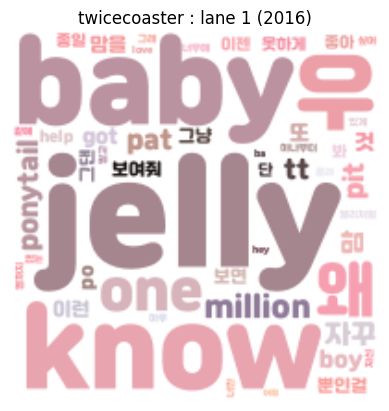

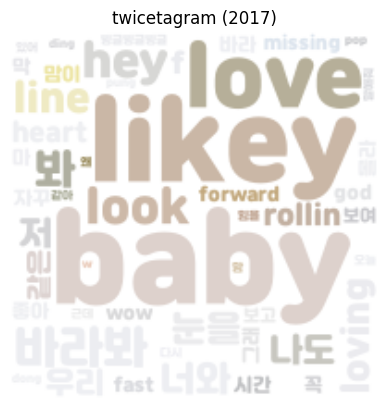

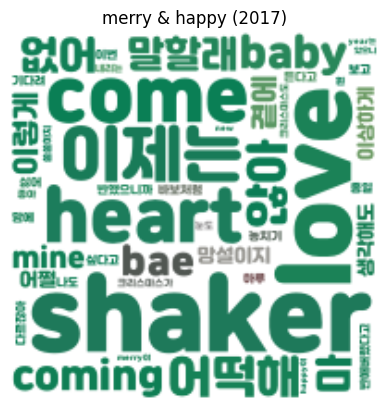

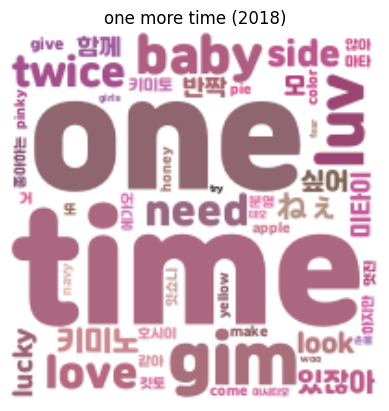

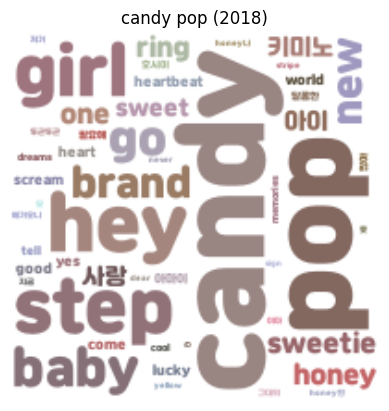

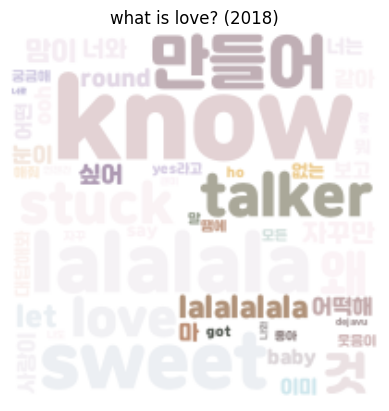

/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/pyt

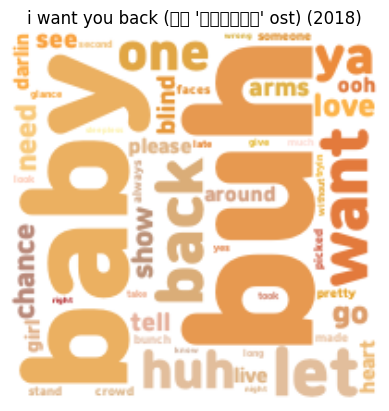

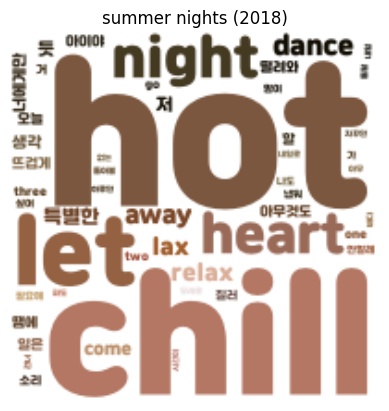

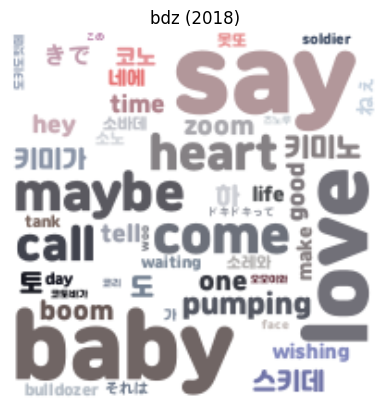

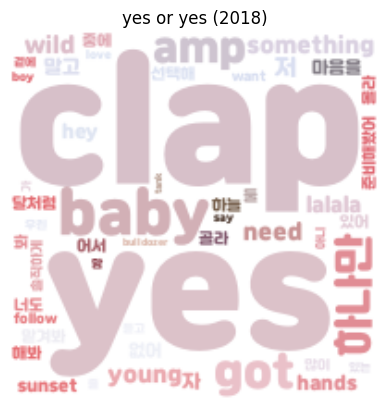

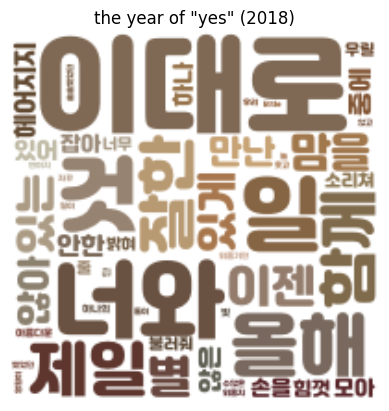

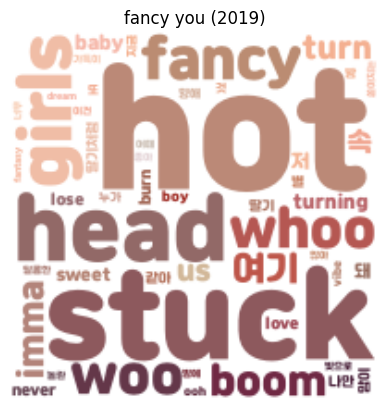

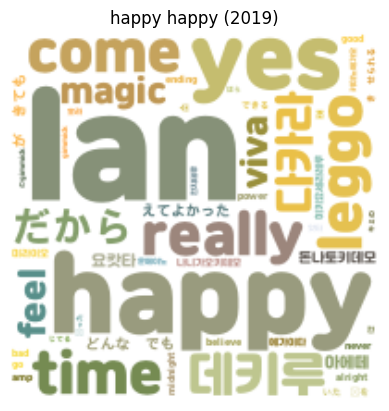

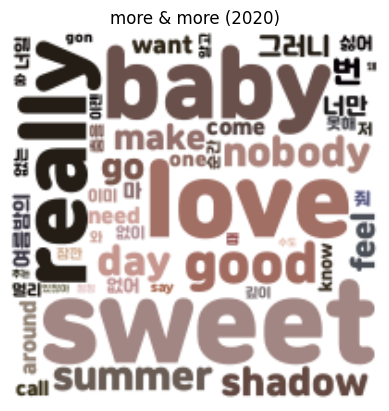

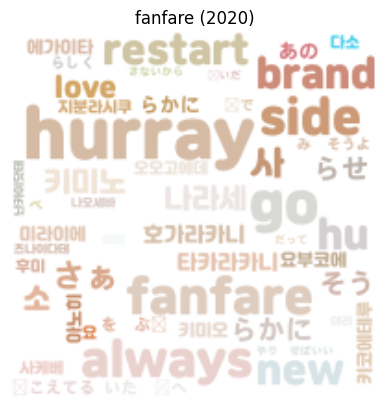

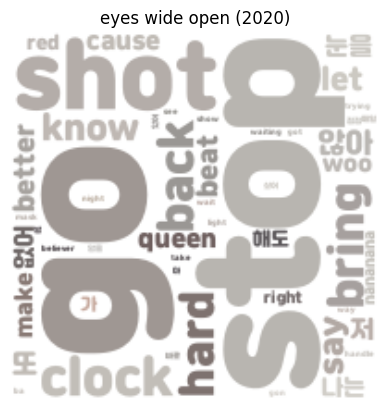

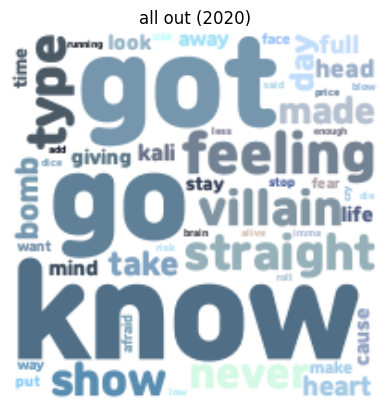

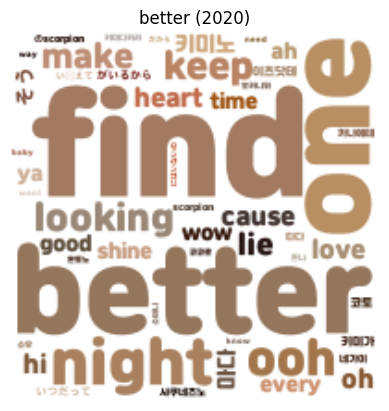

ValueError: ImageColorGenerator is smaller than the canvas

In [89]:
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator,WordCloud
import requests
from io import BytesIO

    # Display the word cloud
import matplotlib.pyplot as plt



value='TWICE'

df = df_album[df_album['artist_name'] == value].dropna(subset=['song_lyrics'])
images = []

for idx, (album_title, year, lyric, album_image) in enumerate(zip(df['album_title'], df['year'], df['song_lyrics'], df['album_image']), start=1):
    # Fetch the image data
    response = requests.get(album_image)
    image_data = BytesIO(response.content)

    # Load the image
    image = Image.open(image_data)

    # Convert image to grayscale for the mask
    alice_coloring = np.array(image.convert('L'))

    word_cloud = WordCloud(width=400, height=200, max_words=50, collocations=False, background_color='white',
                           mask=alice_coloring, font_path='../data/font/JalnanOTF.otf').generate(lyric)

    # Use the original image for color generation
    image_colors = ImageColorGenerator(np.array(image))
    plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis('off')
    plt.title(f'{album_title} ({year})')
    plt.show()

In [91]:
album_image = 'https://image.bugsm.co.kr/album/images/200/40917/4091774.jpg?version=20231007074458.0'

In [93]:
response = requests.get(album_image)
image_data = BytesIO(response.content)
image = Image.open(image_data)
alice_coloring = np.array(image.convert('L'))
# image_colors = ImageColorGenerator(np.array(image))
# recolored_wordcloud = word_cloud.recolor(color_func=image_colors)


In [98]:
alice_coloring.shape

(200, 200)

In [19]:
df_artist_album = df.groupby(['artist_id', 'album_id', 'album_title', 'year']).sum()['song_lyrics'].reset_index()
df_artist_album = df_artist_album.merge(artist_df, how='left', left_on = 'artist_id', right_on='Artist ID')[['artist_id', 'year', 'album_id', 'album_title','English Name', 'song_lyrics']]
df_artist_album = df_artist_album.rename(columns={'English Name': 'artist_name'})
df_artist_album

artist_id  year  album_id  \
0         1168  2000       457   
1         1168  2001      1967   
2         1168  2002     16305   
3         1168  2002     16713   
4         1168  2003     31529   
..         ...   ...       ...   
630   80365655  2022   4081703   
631   80365655  2022  20452295   
632   80365655  2022  20493467   
633   80365655  2023  20551800   
634   80365655  2023  20575852   

                                           album_title artist_name  \
0                                          id; peace b         BOA   
1               don't start now-jumping into the world         BOA   
2                                                 no.1         BOA   
3                                              miracle         BOA   
4                                    atlantis princess         BOA   
..                                                 ...         ...   
630  1st intermixxion single <funky glitter christmas>       NMIXX   
631                                            ad mare       NMIXX   
632                                            entwurf       NMIXX   
633                                            expérgo       NMIXX   
634                          a midsummer nmixx’s dream       NMIXX   

                                           song_lyrics  
0    come come come come come come come come 괜히 가슴이...  
1    누구였을까 내서랍 속에 아주 조심스레 편지가 놓여 있네 이름도 없는 편지속엔 그저 ...  
2    아무것도아니라고 나를위로하려했던 너의그런모습이 더욱 힘들게 너도 원하고 있잖아 애써...  
3    그대를 바라본 내모습 그대가 바라본 내모습 미래를 걷어버리고 그대의 두손을 잡았어 ...  
4    morning sunlight eyes brings life everything w...  
..                                                 ...  
630  another year another round ready look dem spar...  
631  dat 이제야 벗겨지는 veil thanks waitin hi 보면 모두가 pani...  
632  기나긴 밤 반복된 bad dreams 세상을 가려 misty 아득한 sight 틈에...  
633  love like love like love like love right back ...  
634  party time 별이 깨어나는 까만 여름밤 party time 잠을 훔쳐 떠나 ...  

[635 rows x 6 columns]

In [23]:
df_artist_album.to_csv('../data/artist_by_year_and_album.csv', index=0)

In [78]:
def wc_by_year(df=df_artist_year, artist_id_=0):
    df = df[df['artist_id']==artist_id_]
    lyric_lst = [i for i in df.song_lyrics]
    year_lst = [i for i in df.year]

    for lyric in lyric_lst:
        word_cloud = WordCloud(font_path='../data/font/JalnanOTF.otf', width = 1000, height = 500, 
        colormap='BuPu', max_words=50, collocations = False).generate(lyric)

        plt.figure(figsize = (5,5))
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'{df.artist_name.iloc[0]} - {year_lst[lyric_lst.index(lyric)]}')
        plt.show()
        
#         yearr=year_lst[lyric_lst.index(lyric)]
#         word_cloud.to_file(f"data/final_wordcloud_png/{yearr}_wordcloud.png")

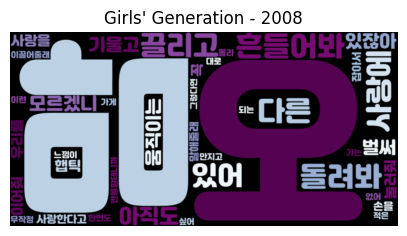

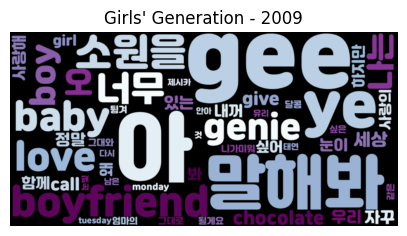

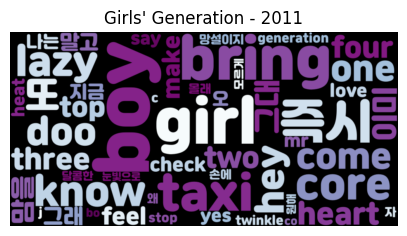

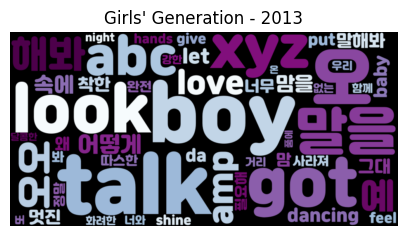

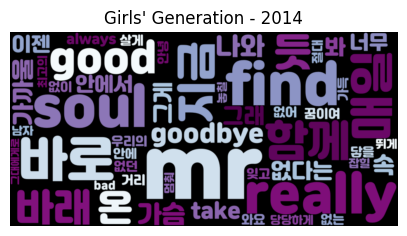

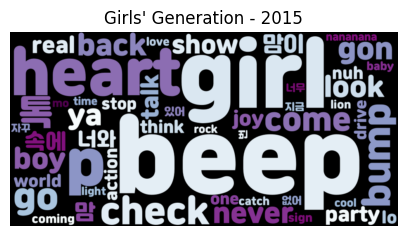

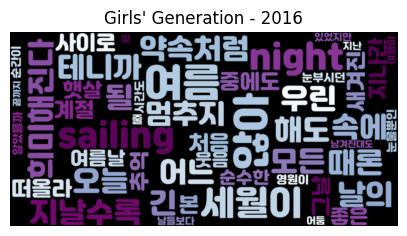

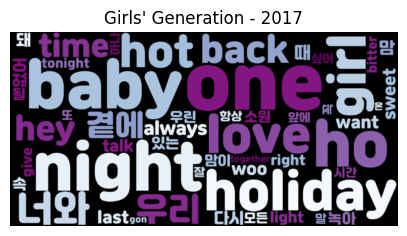

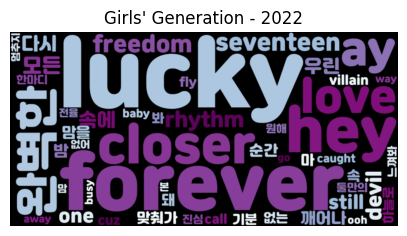

In [79]:
wc_by_year(df_artist_year, 80026432)

In [22]:
def wc_by_album(df, artist_id_):
    
    
    df = df[df['artist_id']==artist_id_]
    df = df.sort_values('year')
    lyric_lst = [i for i in df.song_lyrics]
    year_lst = [i for i in df.year]
    album_lst = [i for i in df.album_title]
    
    artist_name_ = df.artist_name.iloc[0]
    
    
    for lyric in lyric_lst:
        word_cloud = WordCloud(font_path='../data/font/JalnanOTF.otf', width = 1000, height = 500, 
        colormap='prism', background_color= 'white', max_words=30, collocations = False).generate(lyric)

        plt.figure(figsize = (6,4))
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'{artist_name_} - {df.album_title.iloc[lyric_lst.index(lyric)]} - {year_lst[lyric_lst.index(lyric)]}')
        plt.show()
        
#         yearr=year_lst[lyric_lst.index(lyric)]
#         word_cloud.to_file(f"data/final_wordcloud_png/{yearr}_wordcloud.png")

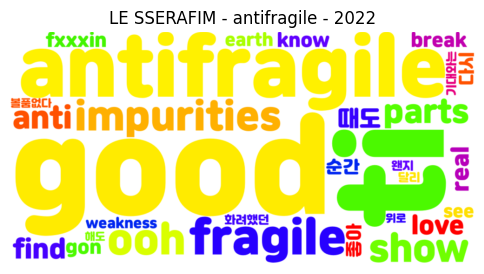

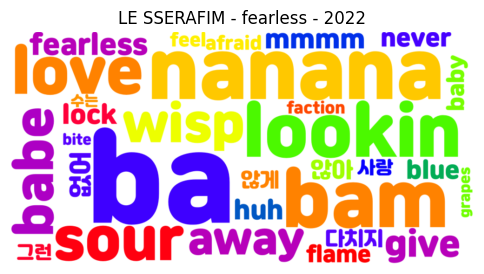

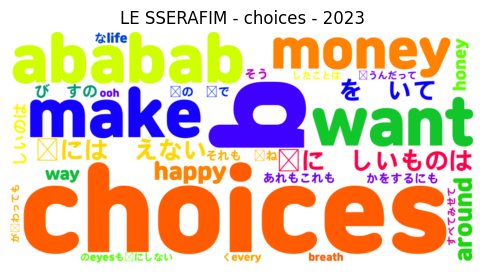

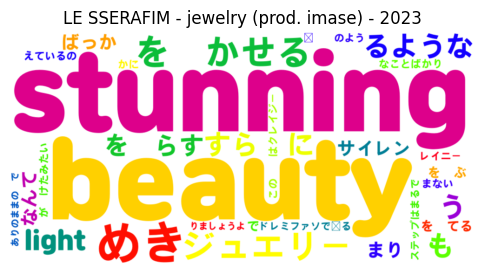

/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiwonshin/.pyenv/versions/3.10.6/envs/test_env/lib/pytho

In [23]:
wc_by_album(df_artist_album, 20158908)

# Translation

In [24]:
# !pip install spacy_langdetect

In [25]:
# pip install --upgrade google-cloud-translate

In [26]:
from google.cloud import translate

def translate_text(target: str, text: str) -> dict:
    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, bytes):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language=target)

    print("Text: {}".format(result["input"]))
    print("Translation: {}".format(result["translatedText"]))
    print("Detected source language: {}".format(result["detectedSourceLanguage"]))

    return result


In [27]:
sample_text = '우리 추억들의 메들리는 멈추지 않아 영원히 really really 친구를 넘어'

In [28]:
translate_text('ko', sample_text)

Forbidden: 403 POST https://translation.googleapis.com/language/translate/v2?prettyPrint=false: Cloud Translation API has not been used in project 221871789903 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/translate.googleapis.com/overview?project=221871789903 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry.

In [ ]:
def print_supported_languages(display_language_code: str):
    client = translate.TranslationServiceClient()

    response = client.get_supported_languages(
        parent=PARENT,
        display_language_code=display_language_code,
    )

    languages = response.languages
    print(f" Languages: {len(languages)} ".center(60, "-"))
    for language in languages:
        language_code = language.language_code
        display_name = language.display_name
        print(f"{language_code:10}{display_name}")
    

In [ ]:
text = "Hello World!"
target_languages = ["tr", "de", "es", "it", "el", "zh", "ja", "ko"]

print(f" {text} ".center(50, "-"))
for target_language in target_languages:
    translation = translate_text(text, target_language)
    source_language = translation.detected_language_code
    translated_text = translation.translated_text
    print(f"{source_language} → {target_language} : {translated_text}")
    

In [ ]:
def papago(text, src="ko", dest="en"):  
    data = {'text' : text,
            'source' : src,
            'target': dest}

    url = "https://openapi.naver.com/v1/papago/n2mt"

    header = {"X-NCP-APIGW-API-KEY-ID":,
              "X-NCP-APIGW-API-KEY":}

    response = requests.post(url, headers=header, data=data)
    rescode = response.status_code

    if(rescode==200):
        send_data = response.json()
        trans_data = (send_data['message']['result']['translatedText'])
        return trans_data
    else:
        print("Error Code:" , rescode)


In [ ]:
import os
import sys
import urllib.request



def papago(text_example):
    client_id = 'uXBinGrMv2aeRek4l_FW' # 개발자센터에서 발급받은 Client ID 값
    client_secret = '_o13F8p9OZ' # 개발자센터에서 발급받은 Client Secret 값
    encText = urllib.parse.quote(text_example)
    data = "source=ko&target=en&text=" + encText
    url = "https://openapi.naver.com/v1/papago/n2mt"
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request, data=data.encode("utf-8"))
    rescode = response.getcode()
    
    if(rescode==200):
        response_body = response.read()
        return response
    else:
        return "Error Code:" + rescode

In [ ]:
hello = papago('그저 몸 뉠 있다고 해서 집이라고 부를 순 없더라 외롭고 지친 맘 기대 쉴 있는 곳')

In [ ]:
type(hello)

In [ ]:
hello

In [ ]:
hello2 = papago('안녕하세요')

In [ ]:
hello2.readinto(b)
# ['translatedText']

In [ ]:
# df = df.reset_index()
df = df.drop(columns=['level_0', 'index'])


In [ ]:
df['translated_lyrics'] = ''
df

In [ ]:
df_trial = df.iloc[0:5]
df_trial

In [ ]:
df_trial['translated_lyrics'] = df_trial['song_lyrics'].apply(lambda x: papago(x))
df_trial

In [ ]:
# import requests

# def deeptranslate(text, sl="ko", tl="en"):
#     url = "https://deep-translate1.p.rapidapi.com/language/translate/v2"
    
#     payload = {
#         "q": text,
#         "source": sl,
#         "target": tl
#     }
#     headers = {
#         "content-type": "application/json",
#         "X-RapidAPI-Key": "b4e9cce2d8msh67117c185af8d26p1a2089jsnfb81161bfddc",
#         "X-RapidAPI-Host": "deep-translate1.p.rapidapi.com"
#     }
    
#     response = requests.request("POST", url, json=payload, headers=headers)
#     translated = response.json()["data"]["translations"]["translatedText"]
#     return translated

In [ ]:
# ! pip3 install google-cloud-translate

In [ ]:
def clean_text(text):

    manual_sw = ['im', 'youre', "n't", '내', '나를', '나의', '너의', '난', '날', '내가', '너','나', '그', '니', '걸', '거야', '수', '다', '더',
'널', '네', '니가', '네가', '널', '너를', '넌', '내게', '이', 'l', 'u', '-',
'na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', '’', 'amp', 'comp',
'tu', 'ye', 'it', 'i', 'but', '너무', 'so', 'in', '또', 'roob', '왔니', '조금', '꼭', '이렇게',
'bo', 'peep', 'the','lolli', '정말', 'for', 'lollipop', '이제', 'on', 'muzik', 'lets', 'about', 
'처', 'amoled', '좀', '두', '닷닷닷닷닷', '어쩌다', '4', 'is', 'and', 'to', 'you', 'me','huh', 'now', 'ooop',
'just', 're', 'jumpin', 'dori', 'let', 'one', '아', 'ma', 'take', 'its', 'woo', 'this', 'that',
'whoo', 'get', 'are', 'dovey', 'hey', '어머어머', 'hush', '오', '나는', '너는', '슈가프리', '자꾸', '위', '아래', '것', '있어', '같아', '돼', 'ya', 'tickle', 'ha',
'way', '싶어', '같은', '오늘', '딱', '않아', '마', 'poppy','같아', 'day', 'be', 'rollin', '게', 'ba', 'hoo', 'ey', 'pa', 'ooh', 'swan', 'woo', 'ill', 'da', 'zu',
'zim', 'dam', 'dda', 'got', 'umpah','안', '건', '할','것도', 'at', 'yah', 'all', 'with', 'ae']


    #changing to lowercase
    text = text.lower()
    text = text.replace('\r','')

    # removing #´s 
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)

    #indentation -> space
    text = re.sub(r'\n', ' ', text)

    for punctuation in string.punctuation:
        text = text.replace(punctuation, '') 

    #strip
    text = text.strip()

    #tokenization
    tokens = word_tokenize(text)   
    filtered_words = [w for w in tokens if w not in manual_sw]
    final = " ".join(cat for cat in filtered_words)

    return final

def kor_to_eng(text):

    #love related
    text = text.replace("사랑", "love")
    text = text.replace("좋아", "like") # like has multiple meanings, so needs to n-gram as well
    text = text.replace("키스", "kiss")
    text = text.replace("입맞", "kiss")
    text = text.replace("뽀뽀", "kiss")
    text = text.replace("터치", 'touch')
    text = text.replace("안아", 'hug')
    text = text.replace("원해", "want")
    text = text.replace("원하", "want")
    text = text.replace("밤", "night")

    #pronouns
#         text = text.replace("내", "my")
    text = text.replace("나의", "my")
    text = text.replace('우리', 'we')

    #gender-specific
    text = text.replace("남자", "man")
    text = text.replace("소년", 'boy')
    text = text.replace("오빠", "oppa")
    text = text.replace("그의", 'him')
    text = text.replace("그에게", 'him')
    text = text.replace("그와", 'him')
    text = text.replace("그를", 'him')
    text = text.replace("그가", 'him')
    text = text.replace("그는", 'him')
    text = text.replace("놈", 'guy')

    text = text.replace("소녀", "nyeo") #young girl (少女)
    text = text.replace("여자", "woman")
    text = text.replace("그녀", 'her')

# want & girl should be dealt with n-grams because the meaning is completely different 
#between English and Korean
#돈 (money)

    return text


In [ ]:
def translate_df(df, col, lang='en'):
    
    translator = Translator()
    df['eng'] = [translator.translate(i, src='ko', dest=lang).text for i in df[col]]   # 한영 변환을 새로운 칼럼 'eng'에 담습니다

    tmp1 = df.drop(['eng'], axis=1)                                                    # 2개의 temporary 데이터프레임을 생성해 원본과 한영번역 데이터프레임을 합칩니다
    tmp2 = df.drop([col], axis=1)
    tmp2.rename(columns={'eng':'data'}, inplace=True)
    result = pd.concat([tmp1,tmp2], ignore_index=True)
    result = result.drop_duplicates()
    
    return result                              

In [ ]:
gg_df = pd.read_csv('gg_final_dataframe.csv')
gg_df = gg_df[['artist_x', 'song_name', 'year', 'Lyric']]

In [ ]:
gg_df['cleaned_lyrics'] = gg_df.Lyric.apply(clean_text)
gg_df['final_lyrics'] = gg_df.cleaned_lyrics.apply(clean_text)
gg_df.drop(columns = ['Lyric', 'cleaned_lyrics'], inplace = True)
by_year_g = gg_df.groupby(['year']).sum()[['final_lyrics']]

In [ ]:
a=by_year_g[-2:-1]
a

In [ ]:
translate_df(a)